Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

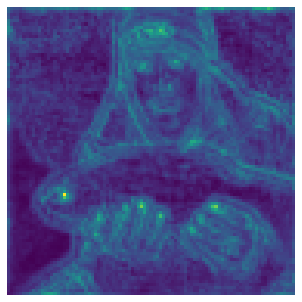

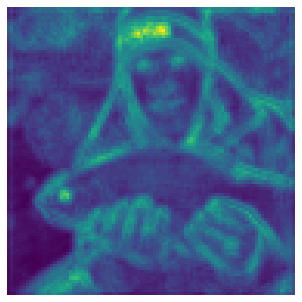

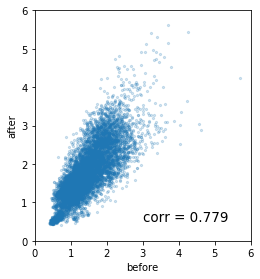

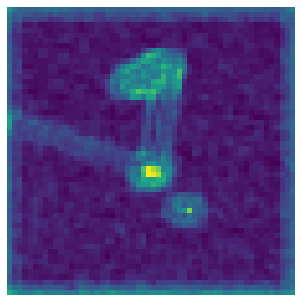

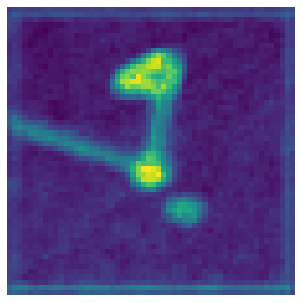

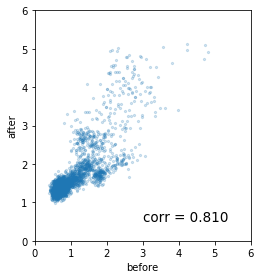

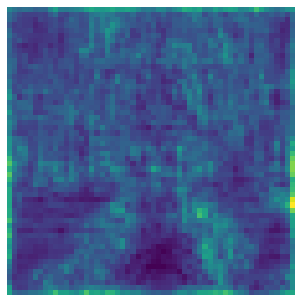

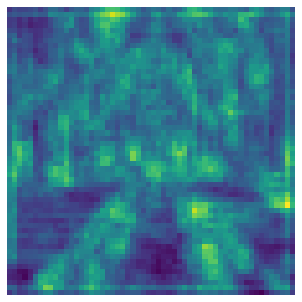

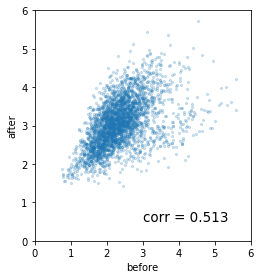

In [2]:
import torch
import numpy
import cv2
import torchvision
import matplotlib
from matplotlib import pyplot as plt

torch.manual_seed(1)

mean = torch.Tensor([0.485, 0.456, 0.406]).reshape(1,-1,1,1)
std  = torch.Tensor([0.229, 0.224, 0.225]).reshape(1,-1,1,1)

Y2 = []

for image in 'ABC':
    
    if image == 'A': img = numpy.array(cv2.imread('ILSVRC2012_val_00017700.JPEG'))[...,::-1]/255.0
    if image == 'B': img = numpy.array(cv2.imread('ILSVRC2012_val_00008161.JPEG'))[...,::-1]/255.0
    if image == 'C': img = numpy.array(cv2.imread('ILSVRC2012_val_00026451.JPEG'))[...,::-1]/255.0
        
    X = (torch.FloatTensor(img[numpy.newaxis].transpose([0,3,1,2])*1) - mean) / std

    modelbefore = torchvision.models.vgg16(pretrained=True); modelbefore.eval()
    modelafter = torchvision.models.vgg16(pretrained=True); modelafter.eval()
    modelrand = torchvision.models.vgg16(pretrained=False); modelrand.eval()
    modelafter.features[12] = modelrand.features[12]
    
    modelbeforeshort = torch.nn.Sequential(modelbefore.features[:14])
    modelaftershort  = torch.nn.Sequential(modelafter.features[:14])
    
    Y1 = modelbeforeshort(X).data.numpy()[0].mean(axis=0)
    Y2 = modelaftershort(X).data.numpy()[0].mean(axis=0)
    
    print(modelbefore.features)
    print(modelbeforeshort)
    
    plt.figure(figsize=(4,4))
    plt.axis('off')
    plt.subplots_adjust(left=0,right=1,bottom=0,top=1)
    plt.imshow(Y1)
    plt.savefig('out/%s-before.png'%(image))
    plt.figure(figsize=(4,4))
    plt.axis('off')
    plt.subplots_adjust(left=0,right=1,bottom=0,top=1)
    plt.imshow(Y2)
    plt.savefig('out/%s-after.png'%(image))
    
    y1n,y2n = Y1.flatten(),Y2.flatten()
    
    plt.figure(figsize=(4,4))
    plt.subplots_adjust(left=0.2,bottom=0.15,top=0.95,right=0.95)
    plt.scatter(y1n,y2n,alpha=0.2,s=5)
    plt.xlabel('before')
    plt.ylabel('after')
    plt.xlim(0,6)
    plt.ylim(0,6)
    plt.text(3,0.5,'corr = %.3f'%numpy.corrcoef(y1n,y2n)[1,0],fontsize=13.5)
    plt.savefig('out/%s.png'%(image))
